In [1]:
%run Data_Preprocessing.ipynb

0.23.1
0.24.2


In [2]:
#add rating feature
from sklearn import neighbors, linear_model
df_new =handle_rating()
trX,teX,trY,teY=make_test_train(df_new)

In [2]:
from sklearn import neighbors, linear_model
df_new =handle_beta()
trX,teX,trY,teY=make_test_train(df_new)

In [2]:
from sklearn import neighbors, linear_model

df_new=sample_data()
trX,teX,trY,teY=make_test_train(df_new)


In [3]:
#balance test
np.sum(df_new['stalt']==0)

860

## Logistic Regression with stat model -- get p value

In [4]:
import statsmodels.api as sm

logit=sm.Logit(trY,trX)
model=logit.fit()

Optimization terminated successfully.
         Current function value: 0.363266
         Iterations 9


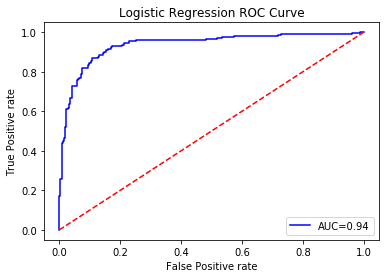

Accuracy score 0.875752
AUC score 0.937341
ks statistic 0.758966


In [5]:
auc_score,accuracy_score,ks=calc_metrics(model,teX,teY,0.5,0)

print('Accuracy score %f' % accuracy_score)
print('AUC score %f' % auc_score)
print('ks statistic %f' % ks)

In [6]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  238
Model:                          Logit   Df Residuals:                      229
Method:                           MLE   Df Model:                            8
Date:                Thu, 25 Jun 2020   Pseudo R-squ.:                  0.4561
Time:                        21:34:17   Log-Likelihood:                -89.353
converged:                       True   LL-Null:                       -164.29
                                        LLR p-value:                 2.088e-28
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
prcc_f                          -1.2458      0.188     -6.629      0.000      -1.614      -0.877
at                               0.1579      0.094      1.681      0.093     

## Logistic Regression with sklearn

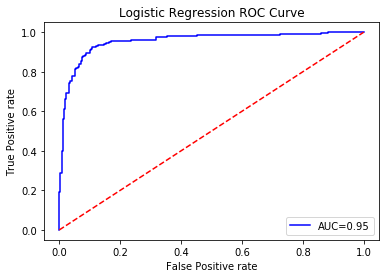

Accuracy score 0.903808
AUC score 0.954952
ks statistic 0.816784


In [6]:
logistic=linear_model.LogisticRegression(penalty='l2',tol=0.0001,C=1000,max_iter=1000,random_state=random_state).fit(trX,trY)
auc_score,accuracy_score,ks=calc_metrics(logistic,teX,teY,0.5,1)

print('Accuracy score %f' % accuracy_score)
print('AUC score %f' % auc_score)
print('ks statistic %f' % ks)

In [7]:
#sklearn accuracy
logistic.score(teX,teY)

0.9038076152304609

In [8]:
logistic.score(trX,trY)

0.883061049011178

In [10]:
logistic.intercept_

array([-10.93739358])

In [11]:
logistic.coef_

array([[-1.56635147e+00,  5.26235914e-01, -4.61528981e-02,
         2.24163644e-01,  4.14823482e-02,  5.91312829e-01,
         5.25165133e+01,  5.05727744e+01,  5.15858851e+01]])